In [1]:
# Connect to data base
import mysql.connector as mysql
from mysql.connector import Error
try:
    db = mysql.connect(
        host = "localhost",
        database='mestrado2NOTA',
        user = "root",
        passwd = "admin"
    )
    
    if db.is_connected():
        cursor = db.cursor(buffered=True)
#         cursor = db.cursor()
except Error as e:
    print("Error while connecting to MySQL", e)
    

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
whereClause = " name='ALGORITMOS E PROGRAMACAO DE COMPUTADORES' "
# whereClause = " name = 'INTRODUCAO A CIENCIA DA COMPUTACAO' "
# whereClause = " name = 'ALGORITMOS E PROGRAMACAO DE COMPUTADORES' OR name = 'COMPUTACAO BASICA' "

# Gráfico 1

# Gráfico 2

In [5]:
select_query = "select semester_year, count(*) as total, SUM(CASE WHEN num_score > 2 THEN 1 ELSE 0 END) as Passed from student_course_subject as SCS INNER JOIN subjects as S ON S.id = SCS.id_subject where" + whereClause + "group by semester_year ;"
cursor.execute(select_query)
records = pd.DataFrame(cursor.fetchall())
records.columns = cursor.column_names


## Gráfico de área

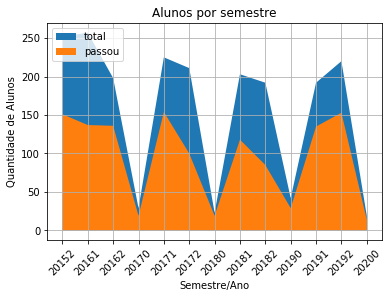

In [13]:
total = records['total']
passou = pd.to_numeric(records['Passed'])

semester_year = records['semester_year'].tolist()
dt = pd.DataFrame()

# y = [total.tolist(), passou.tolist()]

plt.fill_between(semester_year, total.tolist(), label='total', linewidth=2)
plt.fill_between(semester_year, passou.tolist(), label='passou')

plt.legend(loc='upper left')
plt.title('Alunos por semestre')
plt.xlabel('Semestre/Ano')
plt.xticks(rotation=45)
plt.ylabel('Quantidade de Alunos')
plt.grid()
plt.show()

## Gráfico de linhas

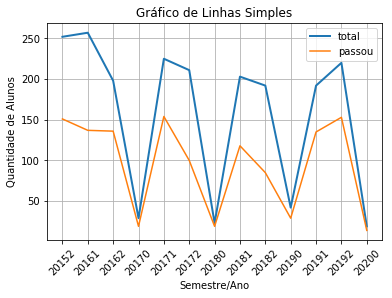

In [12]:
plt.plot(semester_year, total.tolist(), label='total', linewidth=2)

plt.plot(semester_year, passou.tolist(), label='passou')

plt.xlabel('Semestre/Ano')
plt.ylabel('Quantidade de Alunos')
plt.xticks(rotation=45)
plt.title("Gráfico de Linhas Simples")

# Exibe a legenda e por padrão usa o label de cada plot.
plt.legend()
plt.grid()
plt.show()

## Gráfico de Barras

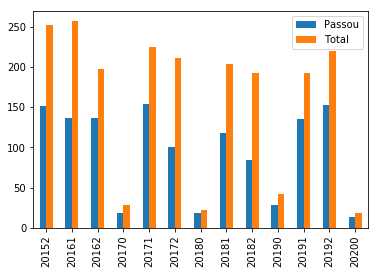

In [24]:
# Total = records['Total']
# Passou = records[records['gender'] == 'M']
# X = np.arange(len(F['course']))

# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.bar(semester_year, total, color = 'b', width = 0.25)
# ax.bar(semester_year, total, color = 'g', width = 0.25)

# plt.xticks(rotation=45)


plotdata = pd.DataFrame({
    "Total":total.to_numpy(),
    "Passou":passou.to_numpy()
    }, 
    index=semester_year
)
plotdata.plot(kind="bar")

## Gráfico de dispersão

# Gráfico 3

In [25]:
select_query = "select semester_year, AVG(num_score) as AVG from student_course_subject as SCS INNER JOIN subjects as S ON S.id = SCS.id_subject where" + whereClause + "group by semester_year ;"
cursor.execute(select_query)
records = pd.DataFrame(cursor.fetchall())
records.columns = cursor.column_names


## Gráfico de linhas

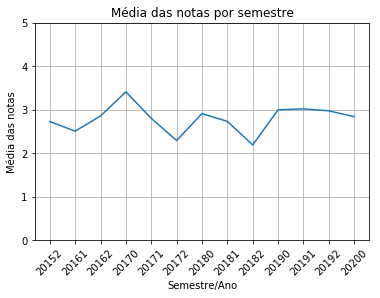

In [26]:
semester_year = records['semester_year'].tolist()
AVG = pd.to_numeric(records['AVG']).tolist()

plt.plot(semester_year, AVG)
plt.title('Média das notas por semestre')
plt.xlabel('Semestre/Ano')
plt.ylabel('Média das notas')
plt.xticks(rotation=45)
plt.axis(ymin=0,ymax=5)
plt.grid()
plt.show()


## Gráfico de barras

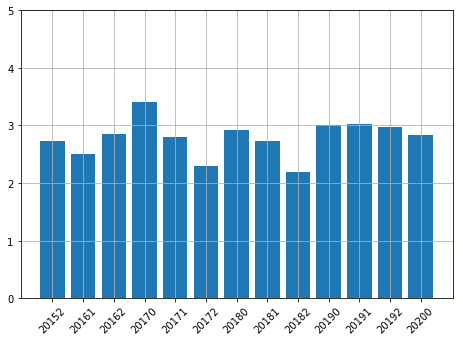

In [29]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = records['semester_year']
students = records['AVG']
ax.bar(langs,students)
plt.xticks(rotation=45)
plt.axis(ymin=0,ymax=5)
plt.grid()
plt.show()

## Gráfico de área

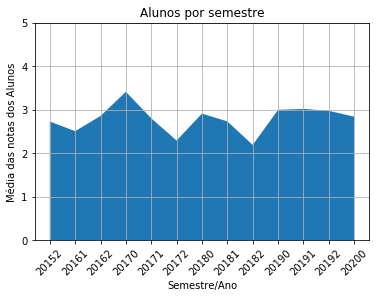

In [41]:
plt.fill_between(records['semester_year'], list(map(float, records['AVG'])))
plt.title('Alunos por semestre')
plt.xlabel('Semestre/Ano')
plt.xticks(rotation=45)
plt.ylabel('Média das notas dos Alunos')
plt.axis(ymin=0,ymax=5)
plt.grid()
plt.show()


## Gráfico de dispersão

In [56]:
select_query = "select semester_year, num_score from student_course_subject as SCS INNER JOIN subjects as S ON S.id = SCS.id_subject where" + whereClause + ";"
cursor.execute(select_query)
records = pd.DataFrame(cursor.fetchall())
records.columns = cursor.column_names


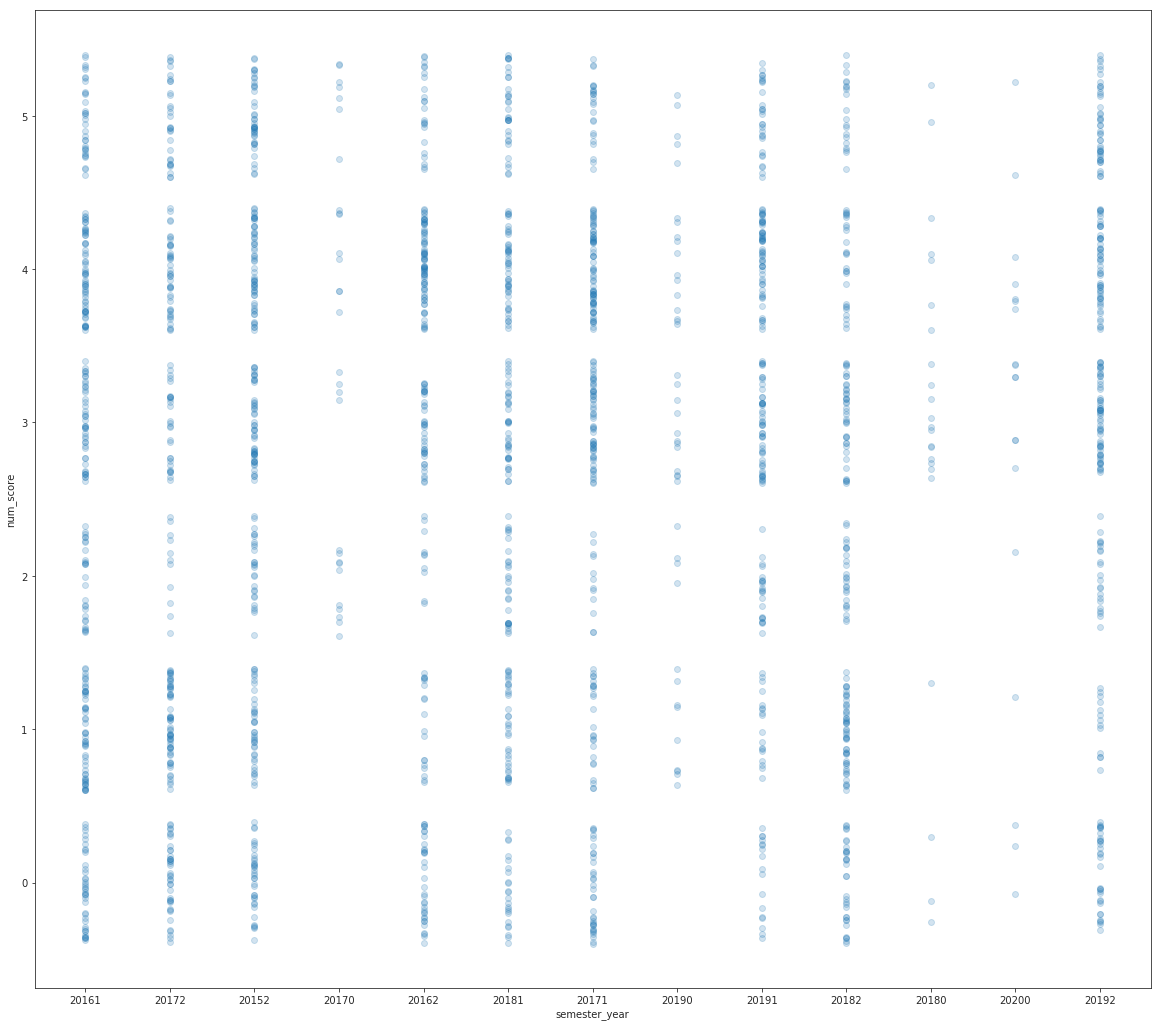

In [100]:
x=records['semester_year'].values.tolist()
xInt = list(map(int, x))
y=records['num_score'].values.tolist()
yStr = list(map(str, records['num_score']))

auxData = records
auxData['semester_year_num'] = xInt
auxData['score'] = yStr


sns.regplot(data = auxData, x = 'semester_year', y = 'num_score', fit_reg = False,
        y_jitter = 0.4, scatter_kws = {'alpha' : 1/5})
plt.gcf().set_size_inches(20, 18)
plt.show()


## Gráfico de dispersão com box-plot

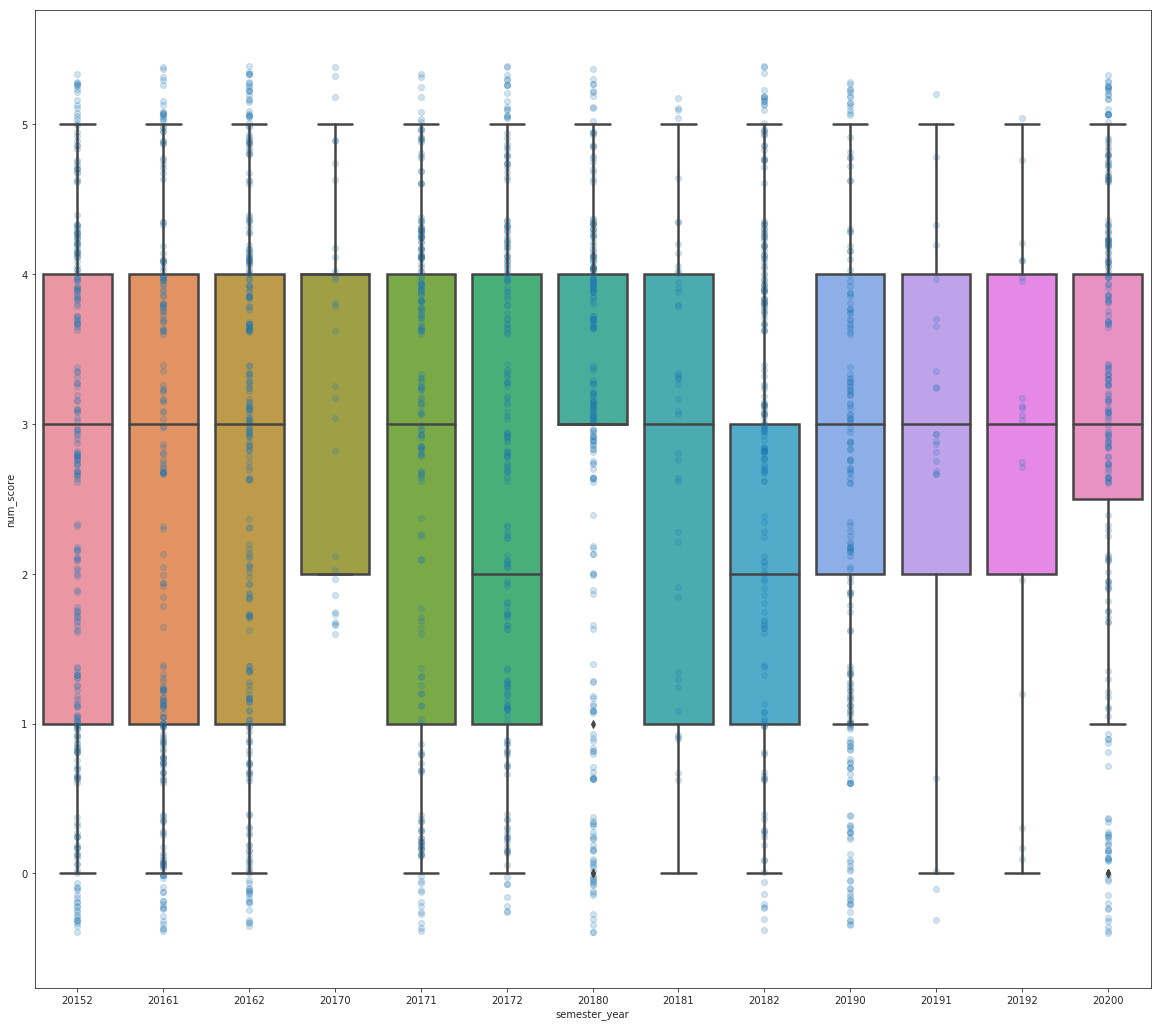

In [113]:
ax = sns.boxplot(x="semester_year", y="num_score",
                 data=auxData, linewidth=2.5)

# ax = sns.swarmplot(x="semester_year", y="num_score", data=auxData, color=".25")
ax = sns.regplot(data = auxData, x = 'semester_year', y = 'num_score', fit_reg = False,
        y_jitter = 0.4, scatter_kws = {'alpha' : 1/5})

# ax = sns.catplot(x="semester_year", y="num_score",
#                 data=auxData, kind="strip",
#                 height=4, aspect=.7);

plt.gcf().set_size_inches(20, 18)
plt.show()


# Gráfico 4/5

In [114]:
select_query = "select num_score from student_course_subject as SCS INNER JOIN subjects as S ON S.id = SCS.id_subject where" + whereClause
cursor.execute(select_query)
records = pd.DataFrame(cursor.fetchall())
records.columns = cursor.column_names


## BoxPlot

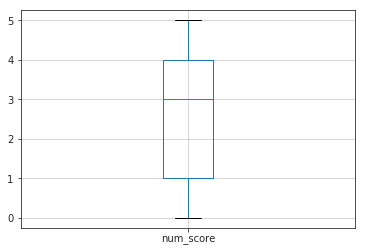

In [115]:
records['num_score'] = records['num_score'].astype(float)
boxplot = records.boxplot(column=['num_score'])

## Gráfico violin

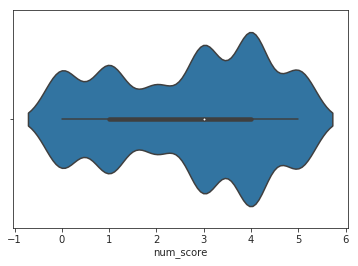

In [116]:
ax = sns.violinplot(x="num_score", data=records)
plt.show()

## Histograma

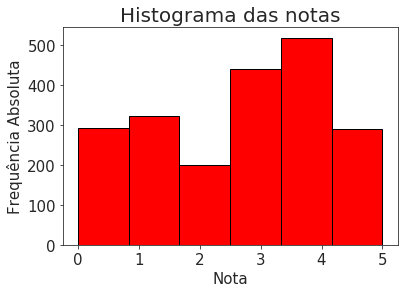

In [136]:
data = records['num_score'].values.tolist()
dataInt = list(map(int, data))


plt.title('Histograma das notas', fontsize=20)
plt.xlabel('Nota', fontsize=15)
plt.ylabel('Frequência Absoluta', fontsize=15)
plt.tick_params(labelsize=15)
plt.hist(dataInt, color='red', edgecolor='black', bins=6)
plt.show()
